In [57]:
# 기본 데이터 준비
fish_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0, 
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0, 
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0, 9.8, 
                10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]
fish_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0, 
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0, 6.7, 
                7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]

# column_stack(튜플)을 사용하여 for문을 사용하지 않아도 2열을 생성할 수 있다.
import numpy as np
fish_data = np.column_stack((fish_length, fish_weight))
print(fish_data)

# concatenate(튜플)를 사용하여 한 줄로 array를 합칠 수 있다.
fish_target = np.concatenate((np.ones(35), np.zeros(14)))
fish_target

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [58]:
# train_test_split() 활용법
# 전달되는 리스트나 배열을 섞고 비율에 맞게 훈련 세트와 테스트 세트로 나누어 줌

from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, random_state= 42)
test_target

array([1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [59]:
# stratify 매개변수에 타깃 데이터를 제시하면 비율에 맞게 데이터를 나누어 줌
train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target,\
    stratify= fish_target, random_state= 42)
test_target

array([0., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1.])

In [60]:
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(train_input, train_target)
kn.score(test_input, test_target)
kn.predict([[25,150]])

array([0.])

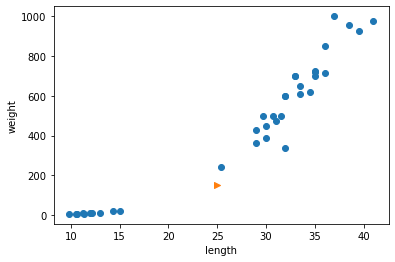

In [61]:
import matplotlib.pyplot as plt
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker= ">")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

[[1. 0. 0. 0. 0.]]


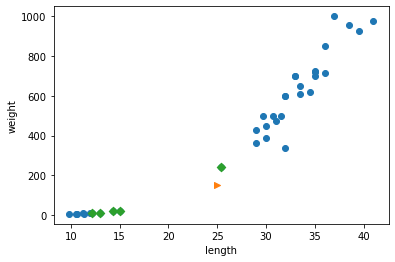

In [62]:
# kneighbors(): 이웃까지의 거리와 이웃까지의 인덱스 반환
distances, indexes = kn.kneighbors([[25, 150]])
print(train_target[indexes])

plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker= ">")
# 넘파이에서는 배열 인덱싱이 가능
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')

plt.xlabel('length')
plt.ylabel('weight')
plt.show()


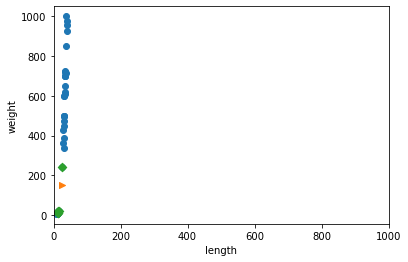

In [63]:
plt.scatter(train_input[:,0], train_input[:,1])
plt.scatter(25,150, marker= ">")
plt.scatter(train_input[indexes, 0], train_input[indexes, 1], marker='D')

# xlim(튜플)을 사용하여 x축의 범위 조정
plt.xlim((0,1000))
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [64]:
# 데이터 전처리: 표준점수
# train_input의 두 열은 스케일이 다르므로 axis = 0을 지정하여 각각 계산
mean = np.mean(train_input, axis = 0) # 평균
std = np.std(train_input, axis= 0) # 표준편차

# 표준점수 = (데이터 - 평균) / 표준편차
# 넘파이에서는 각각 특성의 평균과 표준편차에 맞춰 적용해주는 브로드캐스팅 기능을 가짐
train_scaled = (train_input - mean) / std

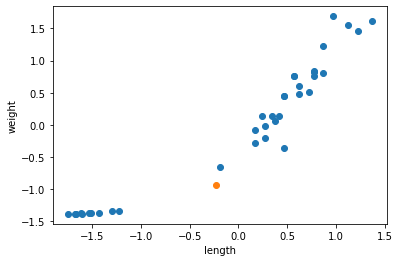

In [65]:
# 새 값도 표준점수로 변환해야 함
new = ([25,150] - mean) / std

plt.scatter(train_scaled[:,0], train_scaled[:,1])
plt.scatter(new[0], new[1])
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [66]:
kn.fit(train_scaled, train_target)

# 테스트 스케일도 마찬가지로 표준점수로 변환
test_scaled = (test_input - mean) / std
kn.score(test_scaled, test_target)

1.0

In [67]:
kn.predict([new])

array([1.])

In [70]:
distances, indexes = kn.kneighbors([new])
train_target[indexes]

array([[1., 1., 1., 1., 1.]])